# Play_Tennis Data Using NB

In [1]:
#importing the necessary libraries
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix 

In [2]:
#importing the data set
df = pd.read_csv(r'C:\Users\nitis\python_project\ML\week9 KNN NB DT\NB\play_tennis.csv')
df.head()

day   outlook  temp humidity    wind play
0  D1     Sunny   Hot     High    Weak   No
1  D2     Sunny   Hot     High  Strong   No
2  D3  Overcast   Hot     High    Weak  Yes
3  D4      Rain  Mild     High    Weak  Yes
4  D5      Rain  Cool   Normal    Weak  Yes

In [3]:
#displaying info of data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 804.0+ bytes


In [4]:
#checking for null values
df.isnull().sum()

day         0
outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

In [5]:
#dropping the coloumn play in order to predict
X = df.drop('play', axis = 1)
X.head()

day   outlook  temp humidity    wind
0  D1     Sunny   Hot     High    Weak
1  D2     Sunny   Hot     High  Strong
2  D3  Overcast   Hot     High    Weak
3  D4      Rain  Mild     High    Weak
4  D5      Rain  Cool   Normal    Weak

In [6]:
#dropping unwanted coloumn day since no need for prediction
X = X.drop('day',axis = 1)
X.head()

outlook  temp humidity    wind
0     Sunny   Hot     High    Weak
1     Sunny   Hot     High  Strong
2  Overcast   Hot     High    Weak
3      Rain  Mild     High    Weak
4      Rain  Cool   Normal    Weak

In [7]:
#since every coloumn in categorical value converting them
from sklearn.preprocessing import LabelEncoder
data_coloumns = ['outlook','temp','humidity','wind']
le = LabelEncoder()
for column in data_coloumns:
    X[column] = le.fit_transform(X[column])
X.head()

outlook  temp  humidity  wind
0        2     1         0     1
1        2     1         0     0
2        0     1         0     1
3        1     2         0     1
4        1     0         1     1

In [8]:
#creating y data
y = df[['play']]
y.head()

play
0   No
1   No
2  Yes
3  Yes
4  Yes

In [9]:
#converting this to numerical
y_e = le.fit_transform(y)
print(y_e)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


C:\Users\nitis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
splits =  [2,3,4,5,6,7,8,9] 
random_states = [0, 42]

In [11]:
result = []
for split_size in splits:
    split_size = split_size / 10
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y_e, test_size=split_size, random_state=random_state , shuffle=True)
        model = GaussianNB()
        nbtrain = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        result.append(["DT","play_tennis", split_size, random_state, accuracy])

result = pd.DataFrame(result, columns=["Model","Data_SET","train-test-split","Random_State","accuracy_score"])

C:\Users\nitis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\nitis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\naive_bayes.py:511: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\nitis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\naive_bayes.py:511: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\nitis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\s

In [12]:
result

Model     Data_SET  train-test-split  Random_State  accuracy_score
0     DT  play_tennis               0.2             0        0.333333
1     DT  play_tennis               0.2            42        1.000000
2     DT  play_tennis               0.3             0        0.400000
3     DT  play_tennis               0.3            42        0.600000
4     DT  play_tennis               0.4             0        0.500000
5     DT  play_tennis               0.4            42        0.666667
6     DT  play_tennis               0.5             0        0.571429
7     DT  play_tennis               0.5            42        0.571429
8     DT  play_tennis               0.6             0        0.444444
9     DT  play_tennis               0.6            42        0.555556
10    DT  play_tennis               0.7             0        0.600000
11    DT  play_tennis               0.7            42        0.600000
12    DT  play_tennis               0.8             0        0.500000
13    DT  play_tennis               0.8            42        0.583333
14    DT  play_tennis               0.9             0        0.615385
15    DT  play_tennis               0.9            42        0.615385

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_e, test_size=0.2, random_state=42 , shuffle=True)
model = GaussianNB()
nbtrain = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [16]:
#creating confusin matrix
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test , y_pred)
con_mat

array([[1, 0],
       [0, 2]], dtype=int64)

<Axes: >

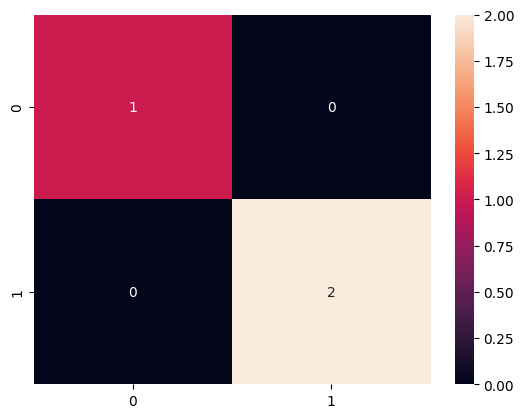

In [17]:
#creating heat map
import seaborn as sns
sns.heatmap(con_mat , annot = True)

In [18]:
result.to_excel("NB_play_tennis_064.xlsx")
